In [112]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, BatchNormalization, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [123]:
df = pd.read_csv("modified_QUANTT_dataset.csv")

In [124]:
df = df[df["Average Value"] < 20]

In [125]:
data = df[['Stock price','Strike price','T','Risk-Free Rate','Historical Volatility']]
targets = df['Average Value']

In [126]:
X_train, X_test, y_train, y_test  = train_test_split(data, targets, test_size=0.2, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

In [127]:
print(X_train.shape, X_test.shape, X_val.shape)

(1651, 5) (206, 5) (207, 5)


Epoch 1/10000
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 3.9220 - val_loss: 3.9652
Epoch 2/10000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9314 - val_loss: 3.9420
Epoch 3/10000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.0340 - val_loss: 3.9328
Epoch 4/10000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6137 - val_loss: 3.9250
Epoch 5/10000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8370 - val_loss: 3.9183
Epoch 6/10000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9300 - val_loss: 3.9114
Epoch 7/10000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8944 - val_loss: 3.9052
Epoch 8/10000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8863 - val_loss: 3.9002
Epoch 9/10000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9521 - val_loss: 3.8970
Epoch 10/10000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.7938 - val_loss: 3.8943
Epoch 11/10000
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 3.8015 - val_loss: 3.8920
Epoch 12/10000
26/26 ━━━━━━━━━━━━━━

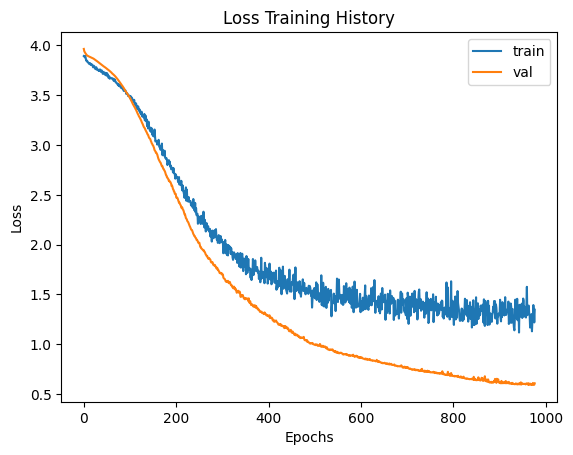

In [128]:
input1 = Input(shape=(X_train.shape[1],), name='input')
normalized_input = BatchNormalization()(input1)

ann_layer1 = Dense(32, activation='relu')(normalized_input)
dropout = Dropout(0.1)(ann_layer1)  
ann_layer2 = Dense(32, activation='relu')(dropout)
dropout2 = Dropout(0.1)(ann_layer2)  

output_layer = Dense(1, activation='relu')(dropout2)

model = tf.keras.Model(inputs=input1, outputs=output_layer)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=1.0)
model.compile(optimizer=optimizer, loss="MSE", metrics=["MAE"])

early_stopping = EarlyStopping(monitor='val_MSE', patience=20, restore_best_weights=True, min_delta=0.01, start_from_epoch=100)

history = model.fit(X_train, y_train, epochs=10000, batch_size=64, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping], shuffle=True)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


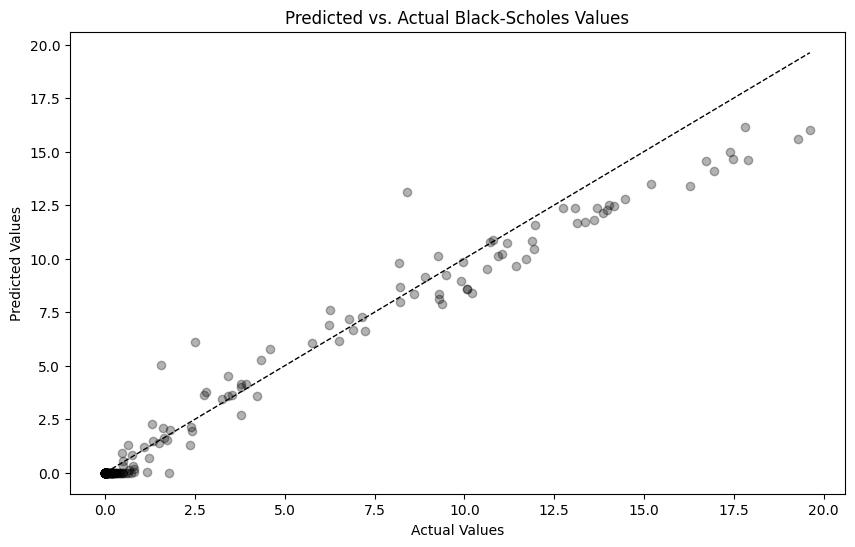

In [130]:
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Visualizing the predictions against the actual Black-Scholes values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='k', alpha=0.3)
plt.title('Predicted vs. Actual Black-Scholes Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
# plt.ylim((0,20))
# plt.xlim((0,20))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)  # Diagonal line for reference
plt.show()


In [121]:
y_pred_flat = y_pred.flatten()

X_test_df = X_test.copy()

# Add y_test and y_pred_flat to the DataFrame
X_test_df['y_test'] = y_test  # Reset index to ensure alignment
X_test_df['y_pred'] = y_pred_flat  # Convert y_pred_flat to a Series for alignment


In [122]:
X_test_df.sort_values(by='y_test').sort_values(by='y_pred')

,Stock price,Strike price,T,Risk-Free Rate,Historical Volatility,y_test,y_pred
115,15.4333,26.899025,0.009924,0.0261,0.294354,2.929573e-82,0.000000
1179,17.3400,18.771125,0.184632,0.0294,0.219702,2.072058e-01,0.000000
928,23.2660,29.477009,0.622631,0.0205,0.221735,1.941307e-01,0.000000
2074,369.3300,649.711933,0.717465,0.0241,0.258466,1.649743e-01,0.000000
547,13.1787,17.700923,0.732733,0.0191,0.245814,1.313151e-01,0.000000
816,18.5360,21.919763,0.325291,0.0242,0.226881,1.302547e-01,0.000000
993,20.9753,24.760531,0.313875,0.0239,0.218982,1.300788e-01,0.000000
824,20.8920,22.454538,0.094918,0.0230,0.226408,1.267547e-01,0.000000
886,21.0667,27.502413,0.599302,0.0236,0.223763,1.217887e-01,0.000000
651,15.1580,16.282922,0.105345,0.0155,0.239285,1.208644e-01,0.000000


In [ ]:
model.save('neural_network_model.keras')